# Time to get your hands dirty. Handwritten digits.
Sometimes you might want to apply multiple ML techniques. For example, just because you have labels in your training data doesn't mean that a regression algorithm will work very well. So, you might want to start with a clustering or dimensional reduction algorithm first.

The goal here it's to familiarize yourself with sklearn and the key ideas behind machine learning. So no worries it's ok if you don't understand the details of the algorithms right now, you'll get them in a few weeks.

Here we're going to use the MNIST database. This contains a set of images with handwritten digts. It is one of the most widely used and best studied datasets in the whole of machine learning. It's part of the standard tests new tecniques need to face.

Let's load the dataset first.

## Tasks. Part 0
1. First thing, grab a piece of paper and visually classify those 25 digits. We'll see if you're better or worse than a computer!
Spoiler alert: Davide's efficiency was ~80%, much worse than ML!

2. Here is how you plot the images and the corresponding labels (The one thing I'm not telling you of course is the random seed I used to select those above). After you've seen this ones, go back to your piece of paper and update your choices if you want. Keep track of both set of preditions. This is like supervised learning.

## Tasks. Part 1. Unsupervised Learning: Dimensionality Reduction on Digits

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to plot points in $N = 64$ dimensions! So we need to reduce the dimensionality of the space.

3. Use the unsupervised dimensionality reduction technique called **Isomap**. Isomap is an embedding technique, which tries to understand if your $N$ dimensional datapoint live in a $N$ dimensional (with $N < M$) manyfold. Reduce the MNIST dataset. Do some plots to visualize your results.

*Note.* Isomap is very recent. It was introduced by [Tenenbaum et al (2000)](https://citations?view_op=view_citation&hl=en&user=fXX5cFQAAAAJ&citation_for_view=fXX5cFQAAAAJ:u5HHmVD_uO8C) --- a paper that has something like $1.5 \times 10^4$ citations.

---

## Tasks. Part 2. Supervised Learning: Classification on Digits

Now we want to classify the dataset.

4. Split the dataset taking 80% of the images as training dataset and leaving the other 20% as a validation set. You need  
   ```python
   sklearn.model_selection.train_test_split

5. Use a simple `LogisticRegression` which despite its name is a common classification algorithm. (I know, this is confusing!).  
   Use the flag `solver='sag'` (I found the default solver had a bug, at least when I tried).

6. Compute the accuracy (`sklearn.metrics.accuracy_score`) of your emulator.  
   In this context, accuracy is simply the fraction of the digits that were correctly identified.  
   Compute the accuracy on both the training and the validation set. Comment on the results.

7. The accuracy is a single number that doesn't tell us *where* we've gone wrong.  
   Plot the **confusion matrix** as we did above. What are the digits that are more challenging to identify?  
   Does it make sense?

There are many ways to improve this classifier, for example using a more sophisticated model,  
use cross validation, etc. We'll get to those in the coming weeks.

In [70]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()

print(digits.images.shape)
print(digits.keys())
print(digits.DESCR)

# the data has got their own label, it's a dataset yet correctly divided


(1797, 8, 8)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into 

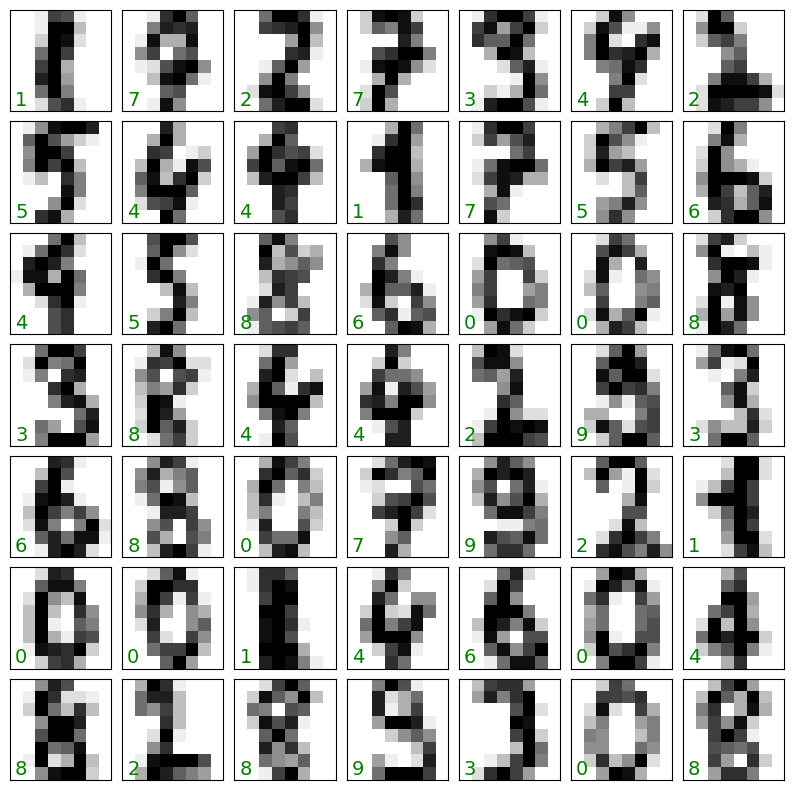

In [71]:
fig, axes = plt.subplots(7,7, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(42)
mychoices = np.random.choice(digits.images.shape[0],49) # took the index of a 49 images in a casual way

for i, ax in enumerate(axes.flat): #I've a 7 X 7 immage of number print because I choose this above
    ax.imshow((digits.images[mychoices[i]]), 
              cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14) # print the corresponding label on the left bottom corner
    ax.set_xticks([])
    ax.set_yticks([])

## **Unsupervised Learning**

/home/bossi_ricky/WSL_Shared/myenv/lib/python3.12/site-packages/sklearn/manifold/_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/bossi_ricky/WSL_Shared/myenv/lib/python3.12/site-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


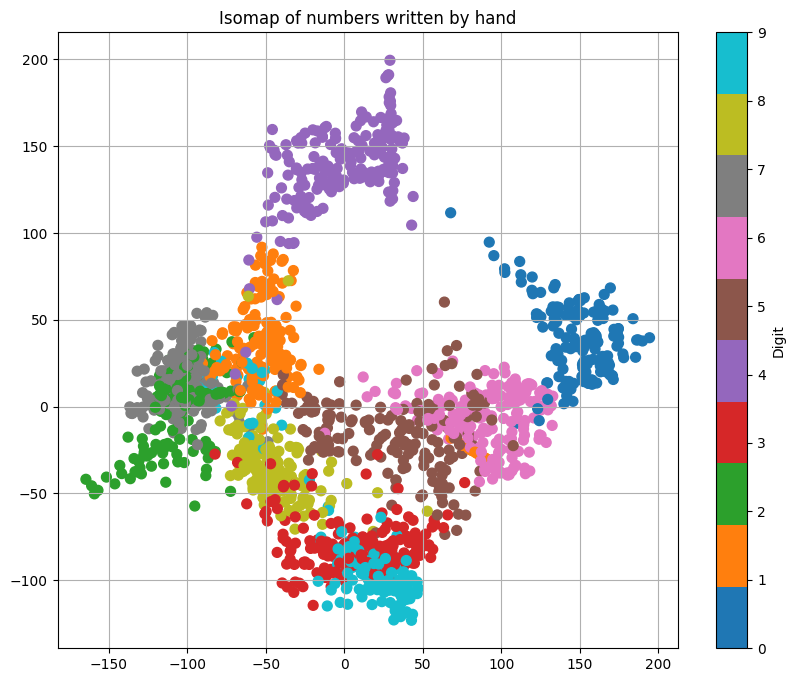

In [72]:
'''Isomap approximates the manifold’s geodesic distances by first linking each image to its k nearest neighbors 
(in the original 64-D pixel space) to build a neighborhood graph, then computing shortest‐path distances along that graph.
It then finds a low-dimensional embedding (here 2D) that best preserves those geodesic distances. 
As a result, images connected by small steps on the underlying manifold—often those sharing structural similarity—appear
close together in the embedding. '''

from sklearn.manifold import Isomap 

X = digits.data

embeddings = Isomap( n_components = 2) #We’re not interested in what the two components are; we just need it to separate the digits, i.e., project from 64 dimensions to 2.
# those axes are the two eigenvectors of the geodesic‐distance kernel

x_trasformed = embeddings.fit_transform(X) # fit trasform it's the method that make the transformation from dim 64 to 2

plt.figure(figsize=(10, 8))
scatter = plt.scatter(x_trasformed[:, 0], x_trasformed[:, 1], 
                      c=digits.target, cmap='tab10', s=50) # N.B. the colour is given by mathplotlib on the base of the TRUE label saved in the sample...

# In essence, Isomap uncovers a 2D embedding that reflects the manifold structure (so similar digits cluster visually), and we overlay each point’s true digit label as its color.”

plt.colorbar(scatter, label='Digit')
plt.title("Isomap of numbers written by hand")
plt.grid(True)
plt.show()


You can see that number 0 is correctly divided from the other with a lot of precision, the other one are just mess up

if you change the number of neighbours the result will change. you should optimize this paramter.


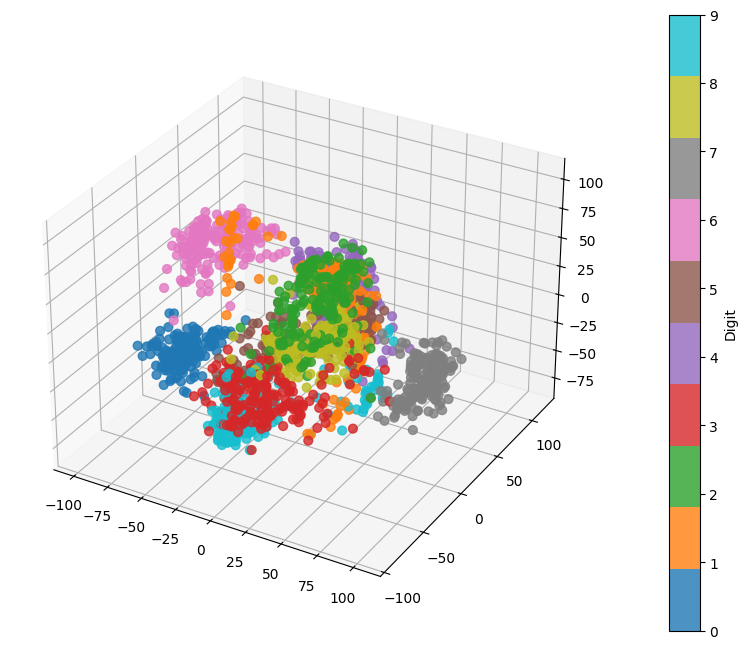

In [73]:
from mpl_toolkits.mplot3d import Axes3D 

# Embedding 3D
iso3 = Isomap(n_components=3, n_neighbors=15)  # let's try in 3 - dim
X3 = iso3.fit_transform(X)

# Plot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(X3[:,0], X3[:,1], X3[:,2],
               c=digits.target,
               cmap='tab10',
               s=40, alpha=0.8)
fig.colorbar(p, ax=ax, pad=0.1, label='Digit')
plt.show()


## **Supervised Learning**

In [74]:
from sklearn.model_selection import train_test_split #it's use for the division of the dataset
from sklearn import linear_model  #thats gave us the logistic regression model

x, y = digits.data , digits.target

Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2) #splitting dataset --> 80% for training and 20% for testing

model = linear_model.LogisticRegression(solver='sag')
model.fit(Xtrain, ytrain) #train the model with X and Y for the training



/home/bossi_ricky/WSL_Shared/myenv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(solver='sag')

In [75]:
from sklearn.metrics import accuracy_score 

ypred = model.predict(Xtest)
print("Accuracy for the test digits:", accuracy_score(ytest, ypred), "\n")

ypred2 =  model.predict(Xtrain)
print("Accuracy for the training digits:", accuracy_score(ytrain, ypred2)) # of course it will be one

Accuracy for the test digits: 0.9583333333333334 

Accuracy for the training digits: 1.0


In [76]:
from sklearn.metrics import confusion_matrix

print("Confusion matrix for the test digits: \n\n" ,confusion_matrix(ytest, ypred) , "\n\n\n")

print("Confusion matrix for the training digits: \n\n", confusion_matrix(ytrain, ypred2))

# confusion matrix is a matrix that show how many times the model predict the right label and how many times it predict the wrong one

Confusion matrix for the test digits: 

 [[40  0  0  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  0  0]
 [ 0  0 37  0  0  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0  0  0]
 [ 0  4  0  0 34  0  0  0  0  0]
 [ 0  0  0  0  1 31  0  0  1  0]
 [ 0  1  0  0  0  1 38  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  0]
 [ 0  2  0  0  0  3  0  0 31  0]
 [ 0  1  0  0  0  1  0  0  0 35]] 



Confusion matrix for the training digits: 

 [[138   0   0   0   0   0   0   0   0   0]
 [  0 149   0   0   0   0   0   0   0   0]
 [  0   0 140   0   0   0   0   0   0   0]
 [  0   0   0 152   0   0   0   0   0   0]
 [  0   0   0   0 143   0   0   0   0   0]
 [  0   0   0   0   0 149   0   0   0   0]
 [  0   0   0   0   0   0 141   0   0   0]
 [  0   0   0   0   0   0   0 144   0   0]
 [  0   0   0   0   0   0   0   0 138   0]
 [  0   0   0   0   0   0   0   0   0 143]]


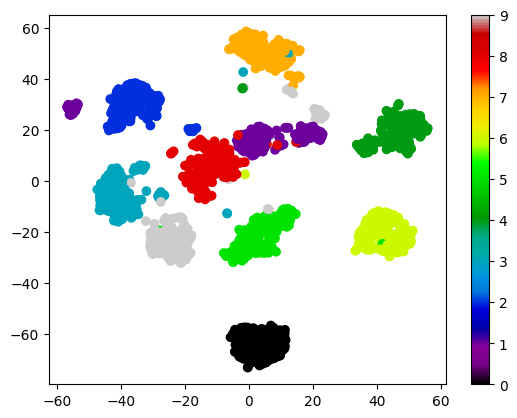

In [77]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,learning_rate=200)
X_reduced = tsne.fit_transform(X)

plt.scatter(X_reduced[:,0],X_reduced[:,1], 
            c=digits.target, cmap="nipy_spectral")
plt.colorbar()

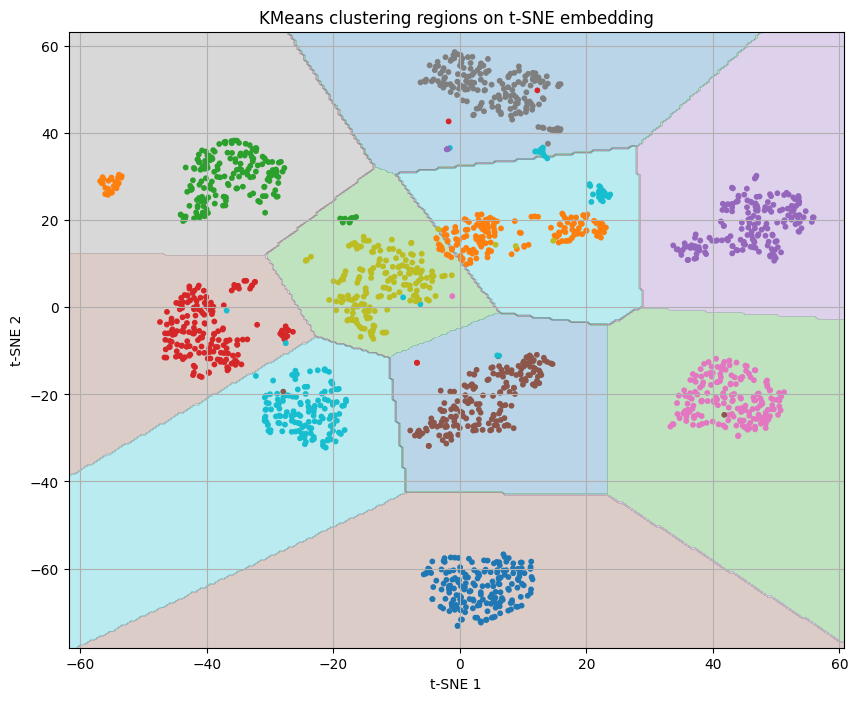

In [79]:
from sklearn.cluster import KMeans

X_reduced = X_reduced.astype(np.float64) 
km = KMeans(n_clusters=10, random_state=0, n_init=20).fit(X_reduced)

# Crea una griglia 2D sull'area del piano t-SNE
h = 0.5  # passo della griglia
x_min, x_max = X_reduced[:, 0].min() - 5, X_reduced[:, 0].max() + 5
y_min, y_max = X_reduced[:, 1].min() - 5, X_reduced[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predici il cluster di ogni punto nella griglia
grid = np.c_[xx.ravel(), yy.ravel()]
Z = km.predict(grid)
Z = Z.reshape(xx.shape)

# Plot delle regioni colorate
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap='tab10', alpha=0.3)

# Sopra ci metti i punti originali
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=digits.target, cmap='tab10', s=10)


plt.title("KMeans clustering regions on t-SNE embedding")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.grid(True)
plt.show()
